In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
df = pd.read_csv("myexcel.csv")

In [17]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [29]:
# Convert 'height' column to numeric, invalid values will become NaN
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

In [33]:
# Replace NaN or invalid height values with random numbers between 150 and 180
df['Height'] = df['Height'].apply(lambda x: np.random.randint(150, 181) if pd.isna(x) or x < 150 or x > 180 else x)

In [35]:
# Verify that the data is now within the valid range (150 - 180)
print(df['Height'].describe())


count    458.000000
mean     164.189956
std        8.866932
min      150.000000
25%      157.000000
50%      164.000000
75%      171.000000
max      180.000000
Name: Height, dtype: float64


In [37]:
# Check for NaN values
print(df['Height'].isna().sum())

0


In [39]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,177,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,162,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,164,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,172,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,150,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,158,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,151,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,159,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,155,231,Kansas,947276.0


In [45]:
# # Save the cleaned dataset
df.to_csv("myexcelcleaned.csv", index=False)

In [43]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,177,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,162,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,164,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,172,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,150,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,158,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,151,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,159,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,155,231,Kansas,947276.0


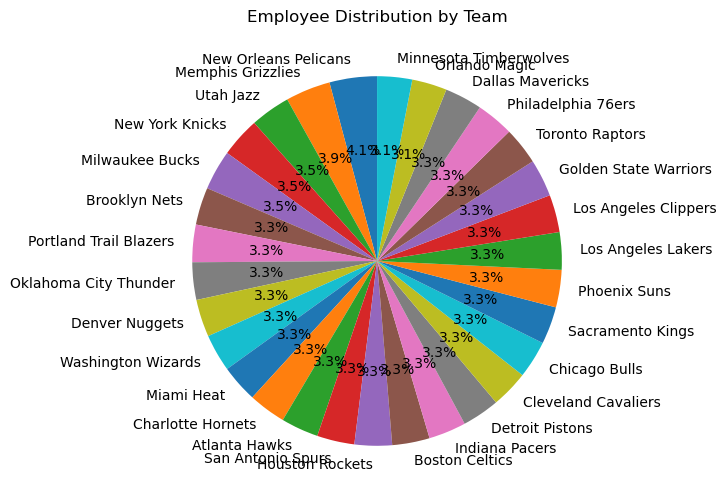

In [87]:
# 1 distribution of employees across each team and calculation of percentage split relative to the total number of employees
# Count the number of employees in each team
team_counts = df['Team'].value_counts()
# total number of employees
total_employees = len(df)
# Calculate the percentage distribution
team_percentage = (team_counts / total_employees) * 100
# Create a DataFrame to display the results
team_distribution = pd.DataFrame({
    'Number of Employees': team_counts,
    'Percentage of Total': team_percentage
})



# Pie chart for team distribution
plt.figure(figsize=(8, 6))
team_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Employee Distribution by Team')
plt.ylabel('')
plt.show()


In [59]:
# Display the distribution
print(team_distribution)

                        Number of Employees  Percentage of Total
Team                                                            
New Orleans Pelicans                     19             4.148472
Memphis Grizzlies                        18             3.930131
Utah Jazz                                16             3.493450
New York Knicks                          16             3.493450
Milwaukee Bucks                          16             3.493450
Brooklyn Nets                            15             3.275109
Portland Trail Blazers                   15             3.275109
Oklahoma City Thunder                    15             3.275109
Denver Nuggets                           15             3.275109
Washington Wizards                       15             3.275109
Miami Heat                               15             3.275109
Charlotte Hornets                        15             3.275109
Atlanta Hawks                            15             3.275109
San Antonio Spurs        

Position
C      79
PF    100
PG     92
SF     85
SG    102
dtype: int64


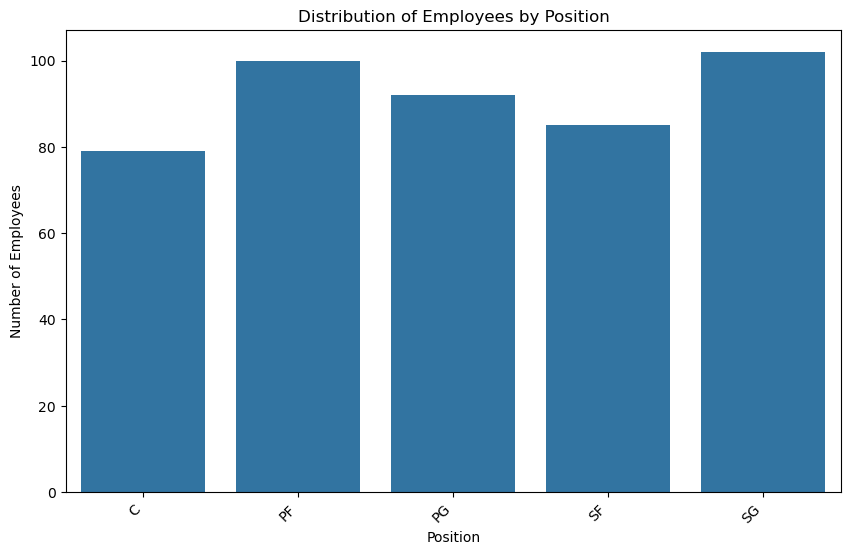

In [97]:
# 2 employees based on their positions withinthe company
# Group employees by their position
position_counts = df.groupby('Position').size()
# Display the result
print(position_counts)


# Bar plot for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.show()




age_group
20-25    179
26-30    167
31-35     68
36-40     23
15-19     21
Name: count, dtype: int64


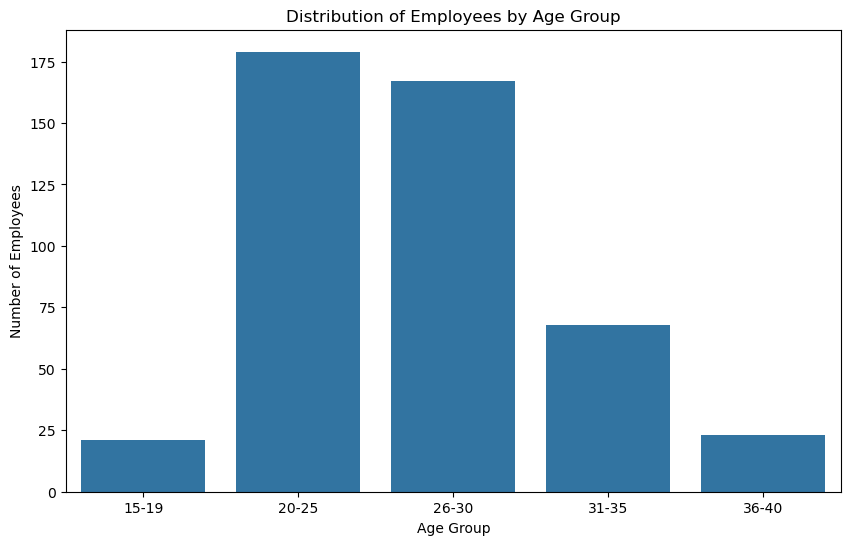

In [99]:
# 3 create age groups and count employees
# Create age groups
bins = [15,20,25,30,35,40]
labels = ['15-19','20-25', '26-30', '31-35','36-40']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
# Count employees in each age group
age_group_counts = df['age_group'].value_counts()
print(age_group_counts)



# Bar plot for age group distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Distribution of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

Cleveland Cavaliers C


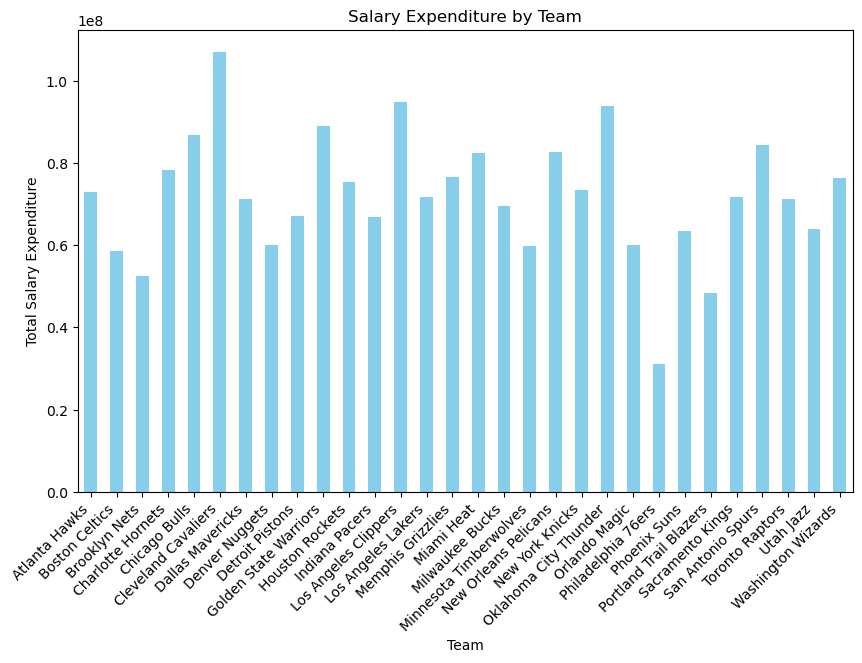

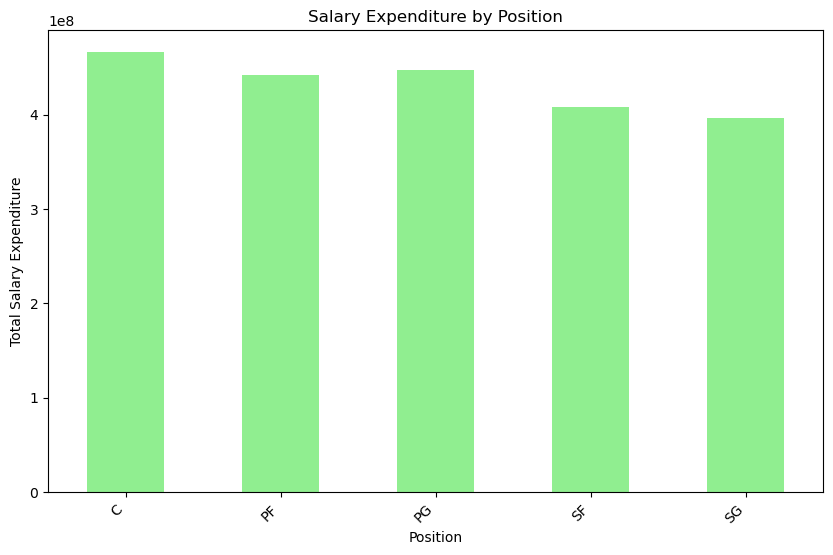

In [101]:
# 4
# team and position with the highest salary expenditure
# Group by team and position and sum the salaries
team_salary = df.groupby('Team')['Salary'].sum()
position_salary = df.groupby('Position')['Salary'].sum()
# Find the team and position with the highest salary expenditure
highest_team_salary = team_salary.idxmax()
highest_position_salary = position_salary.idxmax()
print(highest_team_salary, highest_position_salary)



# Bar plot for team salary expenditure
plt.figure(figsize=(10, 6))
team_salary.plot(kind='bar', color='skyblue')
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar plot for position salary expenditure
plt.figure(figsize=(10, 6))
position_salary.plot(kind='bar', color='lightgreen')
plt.title('Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=45, ha='right')
plt.show()

Correlation between age and salary: 0.21400941226570974


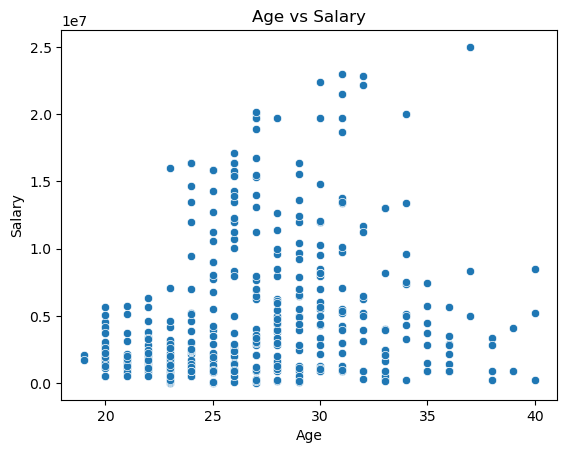

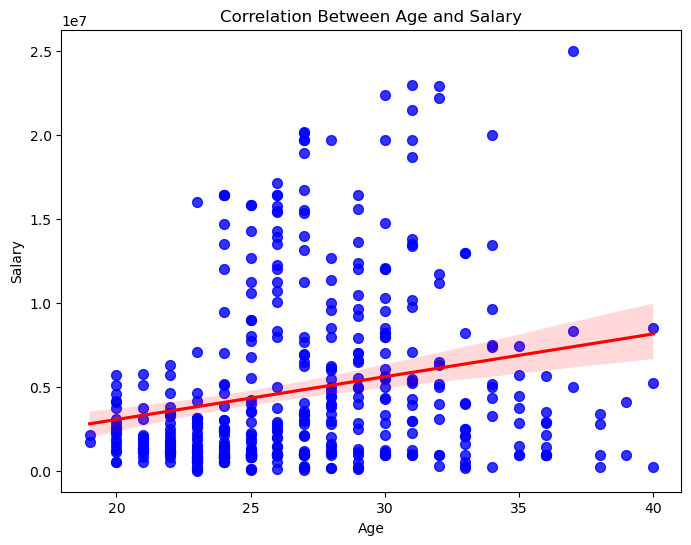

In [105]:
# 5
# Correlation between age and salary
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between age and salary: {correlation}")

# Scatter plot of age vs salary
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title("Age vs Salary")
plt.show()

# Scatter plot for age vs salary with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

The dataset contains information about employees at ABC Company, including their team, position, age, and salary.Our goal is to analyze and provide insights into the company's workforce structure, including team distribution, position segmentation, age distribution, and salary trends.

Before diving into the analysis, I cleaned the data by addressing issues in the 'height' column, replacing any missing or invalid height values with random numbers between 150 and 180 to ensure consistency.

The age distribution reveals that most employees fall within the 20-25 age group. The company has no employees with age above 40, reflecting a likely trend toward hiring younger professionals.

There is a clear positive correlation between age and salary, with older employees generally earning higher salaries. This suggests that the company rewards experience and tenure, with senior employees commanding higher pay. However, the correlation is not perfect, indicating that factors like position and team might also influence salary levels.